In [1]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns 
from collections import Counter 
from IPython.display import display
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chuỗi kết nối đến MongoDB
connection_string = 'mongodb://localhost:27017/'
# Kết nối đến MongoDB
client = MongoClient(connection_string)
# Chọn cơ sở dữ liệu WELL-LOGGING
db = client["welllog"]
# Chọn collection Log
collection = db["log"]
# Lấy dữ liệu từ collection
documents = collection.find()

# Chuyển dữ liệu sang list
data = list(documents)

# Kiểm tra xem có dữ liệu hay không
if len(data) == 0:
    print("No data found in the collection.")
else:
    print(f"Found {len(data)} documents.")

    # Chuyển đổi dữ liệu sang DataFrame
    df = pd.DataFrame(data)
    # Hiển thị DataFrame dưới dạng bảng
    print("DataFrame:")
    display(df)  # Sử dụng display để hiển thị bảng trong Jupyter Notebook


Found 8739 documents.
DataFrame:


,_id,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
0,66c32487252d71ea1c5b0ff8,195.0,226.0848,0.4076,69.8953,132.5052,-0.3548,0.1863,5.1090,1.8878,1.6973,-0.6303,59.2216,30.0657,60.4576
1,66c32487252d71ea1c5b0ff9,195.5,223.5031,0.4063,69.2303,123.6225,-0.3619,0.1867,5.1031,1.8882,1.6791,-0.6409,60.2877,26.7625,54.1495
2,66c32487252d71ea1c5b0ffa,196.0,221.4560,0.4047,68.4478,116.9258,-0.3668,0.1860,5.0872,1.8878,1.6585,-0.6539,61.4914,27.6017,51.9944
3,66c32487252d71ea1c5b0ffb,196.5,219.8248,0.4033,67.4843,111.7925,-0.3613,0.1867,5.0881,1.8884,1.6435,-0.6649,62.3711,31.5870,52.9645
4,66c32487252d71ea1c5b0ffc,197.0,218.1438,0.4023,66.3013,106.7821,-0.3569,0.1870,5.0972,1.8883,1.6390,-0.6705,62.6343,35.8251,54.9659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,66c32488252d71ea1c5b3216,4806.0,1.1354,398.8031,-125.7813,412.4244,42.3643,46.5066,7.8238,6.2264,2.5519,0.2965,9.2449,0.0675,25.8831
8735,66c32488252d71ea1c5b3217,4806.5,1.5895,487.2287,-126.0632,434.0304,41.9099,43.5448,7.8055,6.2264,2.5503,0.2977,9.3399,0.0704,9.4402
8736,66c32488252d71ea1c5b3218,4807.0,4.1163,464.9174,-126.3459,454.8452,58.5249,57.1680,7.8325,6.2250,2.5500,0.2988,9.3589,0.1168,1.7368
8737,66c32488252d71ea1c5b3219,4807.5,8.4264,353.6349,-126.6086,478.5475,69.1482,66.7409,7.8513,6.2243,2.5523,0.2999,9.2228,0.3403,0.1520


In [2]:
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _id     8739 non-null   object 
 1   Depth   8739 non-null   float64
 2   RxoRt   8739 non-null   float64
 3   RLL3    8739 non-null   float64
 4   SP      8739 non-null   float64
 5   RILD    8739 non-null   float64
 6   MN      8739 non-null   float64
 7   MI      8739 non-null   float64
 8   MCAL    8739 non-null   float64
 9   DCAL    8739 non-null   float64
 10  RHOB    8739 non-null   float64
 11  RHOC    8739 non-null   float64
 12  DPOR    8739 non-null   float64
 13  CNLS    8739 non-null   float64
 14  GR      8739 non-null   float64
dtypes: float64(14), object(1)
memory usage: 1.0+ MB
None


In [3]:
# Lấy tên các cột
column_names = df.columns
# Nếu muốn chuyển đổi thành danh sách
column_names_list = list(column_names)
print(column_names_list)

['_id', 'Depth', 'RxoRt', 'RLL3', 'SP', 'RILD', 'MN', 'MI', 'MCAL', 'DCAL', 'RHOB', 'RHOC', 'DPOR', 'CNLS', 'GR']


In [4]:
df.describe(include="all")

,_id,Depth,RxoRt,RLL3,SP,RILD,MN,MI,MCAL,DCAL,RHOB,RHOC,DPOR,CNLS,GR
count,8739,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000,8739.00000,8739.000000,8739.0000,8739.000000,8739.000000
unique,8739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,66c32487252d71ea1c5b0ff8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2535.727372,-18.493591,37.948919,-94.299762,34.511874,11.714442,12.180632,5.906369,3.669944,2.03364,0.126320,39.5532,20.129247,76.948923
std,NaN,1358.246302,31.420924,81.734581,39.652558,251.238360,27.537012,28.874862,1.305561,2.748873,0.41571,0.103907,24.3105,11.427909,33.859411
min,NaN,195.000000,-150.821900,0.389900,-201.623000,0.210400,-0.527400,-0.673500,5.047400,1.885300,1.19050,-0.670500,-1.8873,-0.513900,0.005800
25%,NaN,1292.250000,-31.993950,6.430800,-131.421100,4.356500,0.306700,0.097650,5.089800,1.919350,1.68905,0.049600,14.8416,8.888250,52.336950
50%,NaN,2623.500000,-16.509300,12.138400,-95.587500,7.822900,0.970300,0.361700,5.098500,1.977500,2.00030,0.109800,41.5051,21.053800,77.034000
75%,NaN,3715.750000,-5.941450,25.696300,-58.054000,19.486800,7.978100,7.307150,7.764550,7.850000,2.45620,0.210100,59.7036,29.544100,96.306700


In [5]:
selected_columns = ['Depth', 'SP', 'RILD', 'GR', 'RHOB','RHOC','MN','MI','MCAL','DCAL']


In [6]:
missing_columns = [col for col in selected_columns if col not in df.columns]
if missing_columns:
        print(f"Missing columns in DataFrame: {missing_columns}")
else:
        # Lọc và hiển thị dữ liệu đã chọn
        extracted_data = df[selected_columns].copy(deep=True)
        print("Extracted Data:")
        display(extracted_data)

Extracted Data:


,Depth,SP,RILD,GR,RHOB,RHOC,MN,MI,MCAL,DCAL
0,195.0,69.8953,132.5052,60.4576,1.6973,-0.6303,-0.3548,0.1863,5.1090,1.8878
1,195.5,69.2303,123.6225,54.1495,1.6791,-0.6409,-0.3619,0.1867,5.1031,1.8882
2,196.0,68.4478,116.9258,51.9944,1.6585,-0.6539,-0.3668,0.1860,5.0872,1.8878
3,196.5,67.4843,111.7925,52.9645,1.6435,-0.6649,-0.3613,0.1867,5.0881,1.8884
4,197.0,66.3013,106.7821,54.9659,1.6390,-0.6705,-0.3569,0.1870,5.0972,1.8883
...,...,...,...,...,...,...,...,...,...,...
8734,4806.0,-125.7813,412.4244,25.8831,2.5519,0.2965,42.3643,46.5066,7.8238,6.2264
8735,4806.5,-126.0632,434.0304,9.4402,2.5503,0.2977,41.9099,43.5448,7.8055,6.2264
8736,4807.0,-126.3459,454.8452,1.7368,2.5500,0.2988,58.5249,57.1680,7.8325,6.2250
8737,4807.5,-126.6086,478.5475,0.1520,2.5523,0.2999,69.1482,66.7409,7.8513,6.2243


In [7]:
df_extracted = extracted_data
df_extracted.isnull().sum().sort_values(ascending = False)

Depth    0
SP       0
RILD     0
GR       0
RHOB     0
RHOC     0
MN       0
MI       0
MCAL     0
DCAL     0
dtype: int64

In [8]:
df_extracted.describe(include="all")

,Depth,SP,RILD,GR,RHOB,RHOC,MN,MI,MCAL,DCAL
count,8739.000000,8739.000000,8739.000000,8739.000000,8739.00000,8739.000000,8739.000000,8739.000000,8739.000000,8739.000000
mean,2535.727372,-94.299762,34.511874,76.948923,2.03364,0.126320,11.714442,12.180632,5.906369,3.669944
std,1358.246302,39.652558,251.238360,33.859411,0.41571,0.103907,27.537012,28.874862,1.305561,2.748873
min,195.000000,-201.623000,0.210400,0.005800,1.19050,-0.670500,-0.527400,-0.673500,5.047400,1.885300
25%,1292.250000,-131.421100,4.356500,52.336950,1.68905,0.049600,0.306700,0.097650,5.089800,1.919350
50%,2623.500000,-95.587500,7.822900,77.034000,2.00030,0.109800,0.970300,0.361700,5.098500,1.977500
75%,3715.750000,-58.054000,19.486800,96.306700,2.45620,0.210100,7.978100,7.307150,7.764550,7.850000
max,4808.000000,69.895300,11510.641600,404.288100,2.74230,0.357500,252.124200,234.871500,10.308600,12.334900


In [9]:
# Lấy giá trị cao nhất và thấp nhất trong cột Depth
max_depth = extracted_data['Depth'].max()
min_depth = extracted_data['Depth'].min() 
max_GR = extracted_data['GR'].max() # GR Clay is the maximum GR value in the interval
min_GR = extracted_data['GR'].min() # GR Clean is the minimum GR value in the interval
max_SP = extracted_data['SP'].max()# SP Clay is the maximum GR value in the interval
min_SP =extracted_data['SP'].min()# SP Clean is the minimum GR value in the interval
max_RHOB = extracted_data['RHOB'].max()
min_RHOB =extracted_data['RHOB'].min()
max_RHOC = extracted_data['RHOC'].max()
min_RHOC =extracted_data['RHOC'].min()
print(f"Maximum Depth: {max_depth}")
print(f"Minimum Depth: {min_depth}")
print(f"Maximum GR: {max_GR}")
print(f"Minimum GR: {min_GR}")
print(f"Maximum SP: {max_SP}")
print(f"Minimum SP: {min_SP}")
print(f"Maximum RHOB: {max_RHOB}")
print(f"Minimum RHOB: {min_RHOB}")

Maximum Depth: 4808.0
Minimum Depth: 195.0
Maximum GR: 404.2881
Minimum GR: 0.0058
Maximum SP: 69.8953
Minimum SP: -201.623
Maximum RHOB: 2.7423
Minimum RHOB: 1.1905


In [10]:
# Create the figure and subplots
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=extracted_data[(extracted_data['Depth'] >= top_depth) & (extracted_data['Depth'] <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("WELL-LOGGING", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 

    ax10=ax[0].twiny()
    ax10.set_xlim(min_SP,max_SP)
    ax10.spines['top'].set_position(('outward',0))
    ax10.set_xlabel("SP [mV]")
    ax10.plot(logs['SP'], logs['Depth'], label='SP[mV]', color='blue')
    ax10.set_xlabel('SP[mV]',color='blue')    
    ax10.tick_params(axis='x', colors='blue')
    ax10.grid(True)

    ax11=ax[1].twiny()
    ax11.set_xlim(0,max_GR)
    ax11.plot(logs['GR'], logs['Depth'], label='GR[api]', color='green') 
    ax11.spines['top'].set_position(('outward',0))
    ax11.set_xlabel('GR[api]',color='green')    
    ax11.tick_params(axis='x', colors='green')

    ax12=ax[2].twiny()
    ax12.set_xlim(min_RHOB,max_RHOB)
    ax12.plot(logs['RHOB'], logs['Depth'] ,label='RHOB[g/cc]', color='red') 
    ax12.spines['top'].set_position(('outward',0))
    ax12.set_xlabel('RHOB[g/cc]',color='red')
    ax12.tick_params(axis='x', colors='red')

    ax13=ax[3].twiny()
    ax13.set_xlim(min_RHOC,max_RHOC)
    ax13.plot(logs['RHOC'], logs['Depth'] ,label='RHOC[g/cc]', color='purple') 
    ax13.spines['top'].set_position(('outward',0))
    ax13.set_xlabel('RHOC[g/cc]',color='purple')
    ax13.tick_params(axis='x', colors='purple')

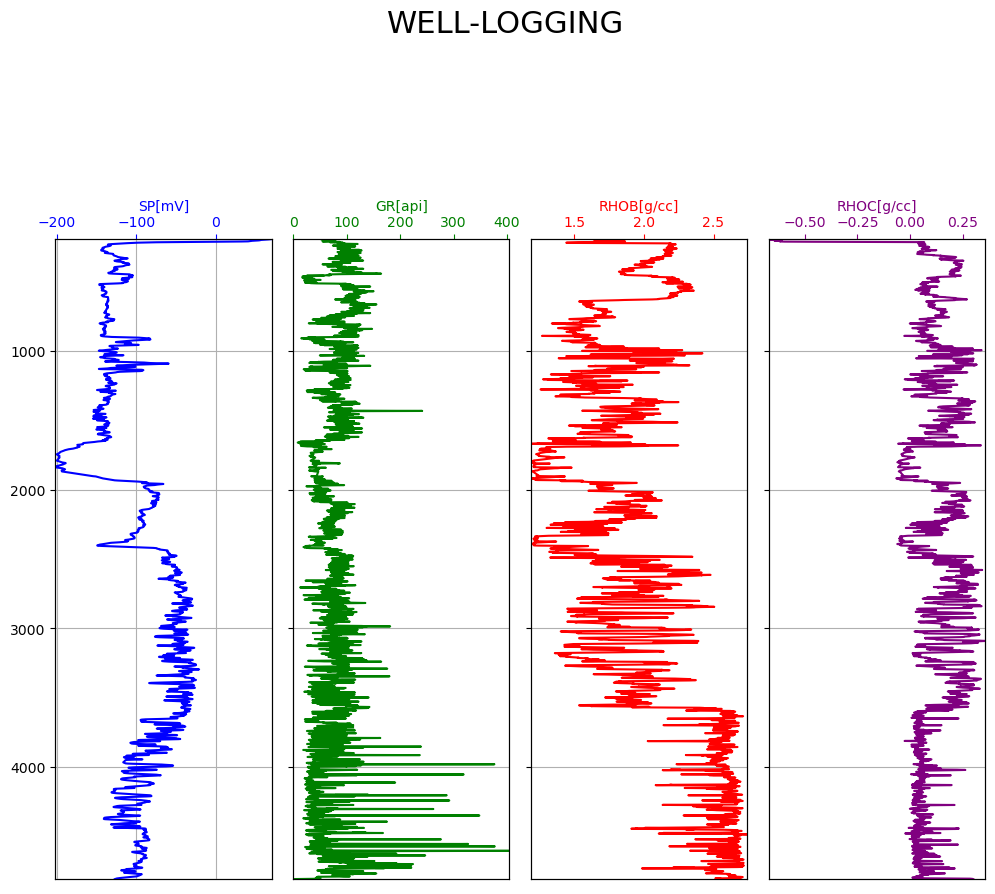

In [11]:
top_depth = extracted_data['Depth'].iloc[0]
bottom_depth = extracted_data['Depth'].iloc[-1]
triple_combo_plot(top_depth,bottom_depth)

Calculate Volume of Clay

In [12]:
#VCLSP
def vclsp(sp_log, sp_clean, sp_clay):
    vclsp=(sp_log-sp_clean)/(sp_clay-sp_clean)
    return vclsp

In [13]:
# Filter logs between the specified depths
logs = extracted_data[(extracted_data['Depth'] >= top_depth) & (extracted_data['Depth'] <= bottom_depth)].copy()

# Set clean and clay SP values
sp_clean, sp_clay = min_SP, max_SP

# Calculate VCLSP values using a vectorized approach with apply
logs['VCLSP'] = logs['SP'].apply(lambda m: vclsp(m, sp_clean, sp_clay))

# Optional: Display the modified DataFrame to verify results
print(logs.head())


   Depth       SP      RILD       GR    RHOB    RHOC      MN      MI    MCAL  \
0  195.0  69.8953  132.5052  60.4576  1.6973 -0.6303 -0.3548  0.1863  5.1090   
1  195.5  69.2303  123.6225  54.1495  1.6791 -0.6409 -0.3619  0.1867  5.1031   
2  196.0  68.4478  116.9258  51.9944  1.6585 -0.6539 -0.3668  0.1860  5.0872   
3  196.5  67.4843  111.7925  52.9645  1.6435 -0.6649 -0.3613  0.1867  5.0881   
4  197.0  66.3013  106.7821  54.9659  1.6390 -0.6705 -0.3569  0.1870  5.0972   

     DCAL     VCLSP  
0  1.8878  1.000000  
1  1.8882  0.997551  
2  1.8878  0.994669  
3  1.8884  0.991120  
4  1.8883  0.986763  


Text(0.5, 0, 'VCL [v.v]')

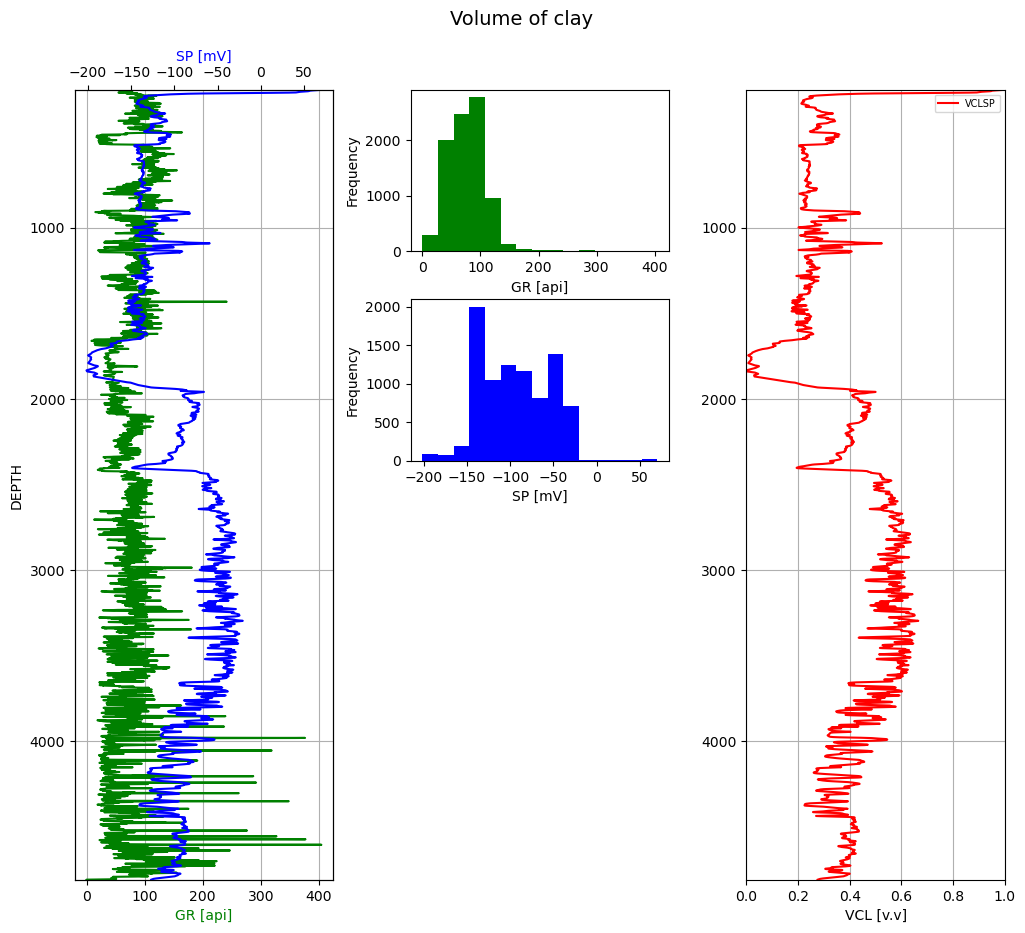

In [14]:
from matplotlib import gridspec
fig = plt.figure(figsize=(12,10))
fig.suptitle('Volume of clay ',fontsize=14)
fig.subplots_adjust(top=0.90,wspace=0.3, hspace =0.3)

gs = gridspec.GridSpec(4, 3)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[:,2],sharey = ax1)

# Graph for GR,SP

ax1.invert_yaxis()
ax1.grid(True)
ax1.set_ylabel('DEPTH')
ax1.plot(logs['GR'], logs['Depth'], color='green')
ax1.set_xlabel('GR [api]', color='green')

ax11=ax1.twiny()
ax11.plot(logs['SP'], logs['Depth'], color='blue')
ax11.set_xlabel("SP [mV]",color='blue')

#The graph of GR histogram
ax2.hist(logs['GR'].dropna(),bins=15,color='green')
ax2.set_xlabel('GR [api]')
ax2.set_ylabel('Frequency')

ax3.hist(logs['SP'].dropna(),bins=15, color='blue')
ax3.set_xlabel('SP [mV]')
ax3.set_ylabel('Frequency')

#plt.title("Volume of Clay")


ax6.plot(logs['VCLSP'], logs['Depth'],label ='VCLSP',color="red")
ax6.legend(loc='best',fontsize='x-small')
ax6.set_xlim(0,1)
ax6.set_ylim(top_depth,bottom_depth)
ax6.invert_yaxis()
ax6.grid(True)
ax6.set_xlabel('VCL [v.v]')


In [15]:
numeric_columns = df_extracted.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_columns)

['Depth', 'SP', 'RILD', 'GR', 'RHOB', 'RHOC', 'MN', 'MI', 'MCAL', 'DCAL']


C:\Users\admin\AppData\Local\Temp\ipykernel_1912\1018306940.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


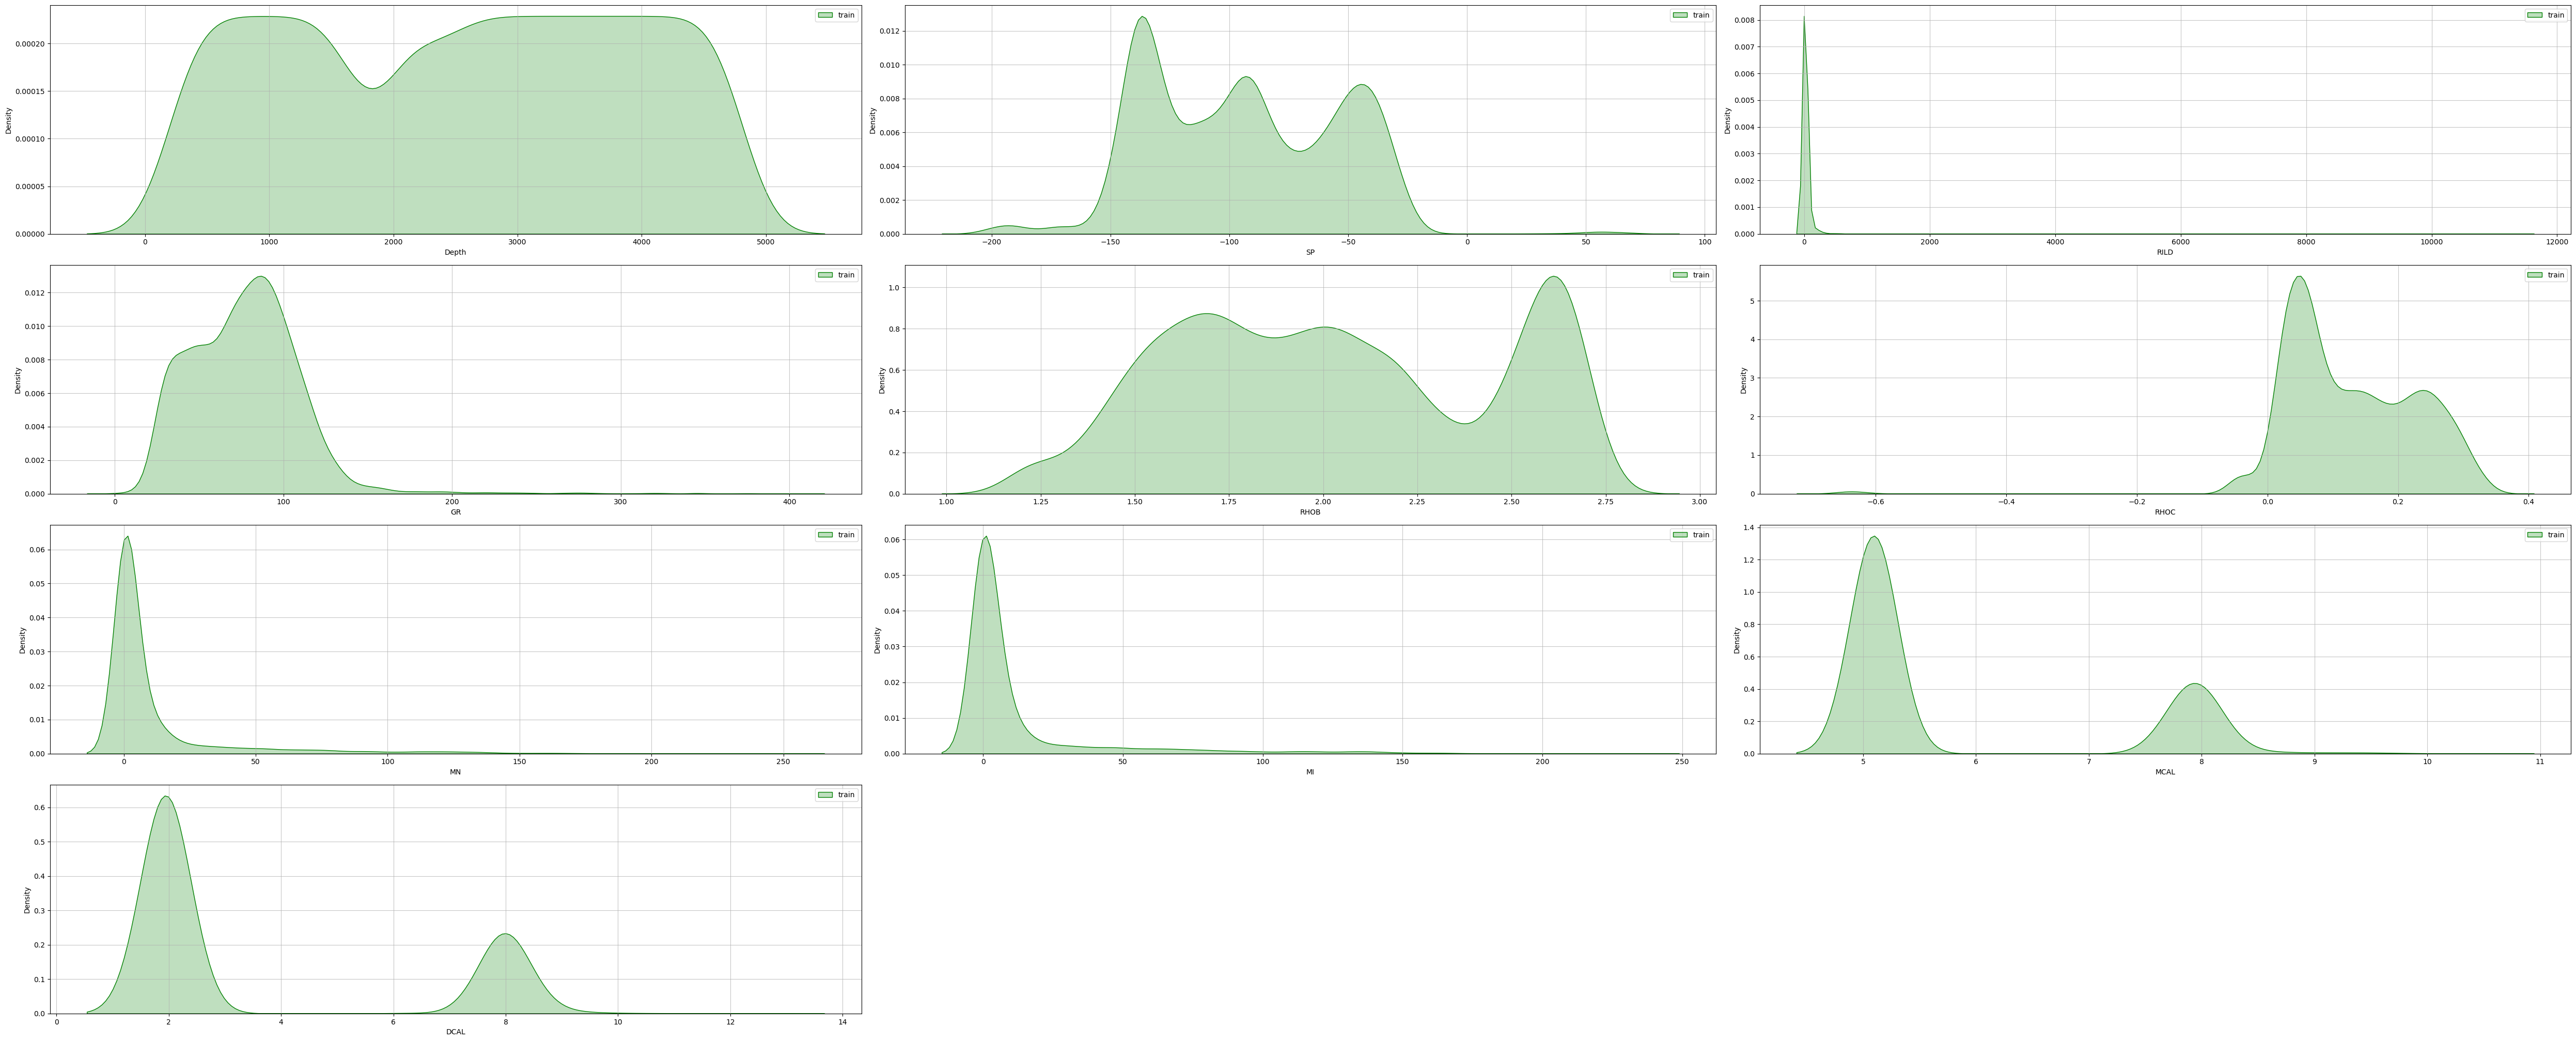

In [16]:
numeric_columns = list(df_extracted.select_dtypes(include=['float64', 'int64']).columns)
fig = plt.figure(figsize=(50,50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:10]): 
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha=0.7, axis='both')
    sns.kdeplot(x=num, fill=True, color='green', linewidth=1, data=df_extracted, label='train')
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

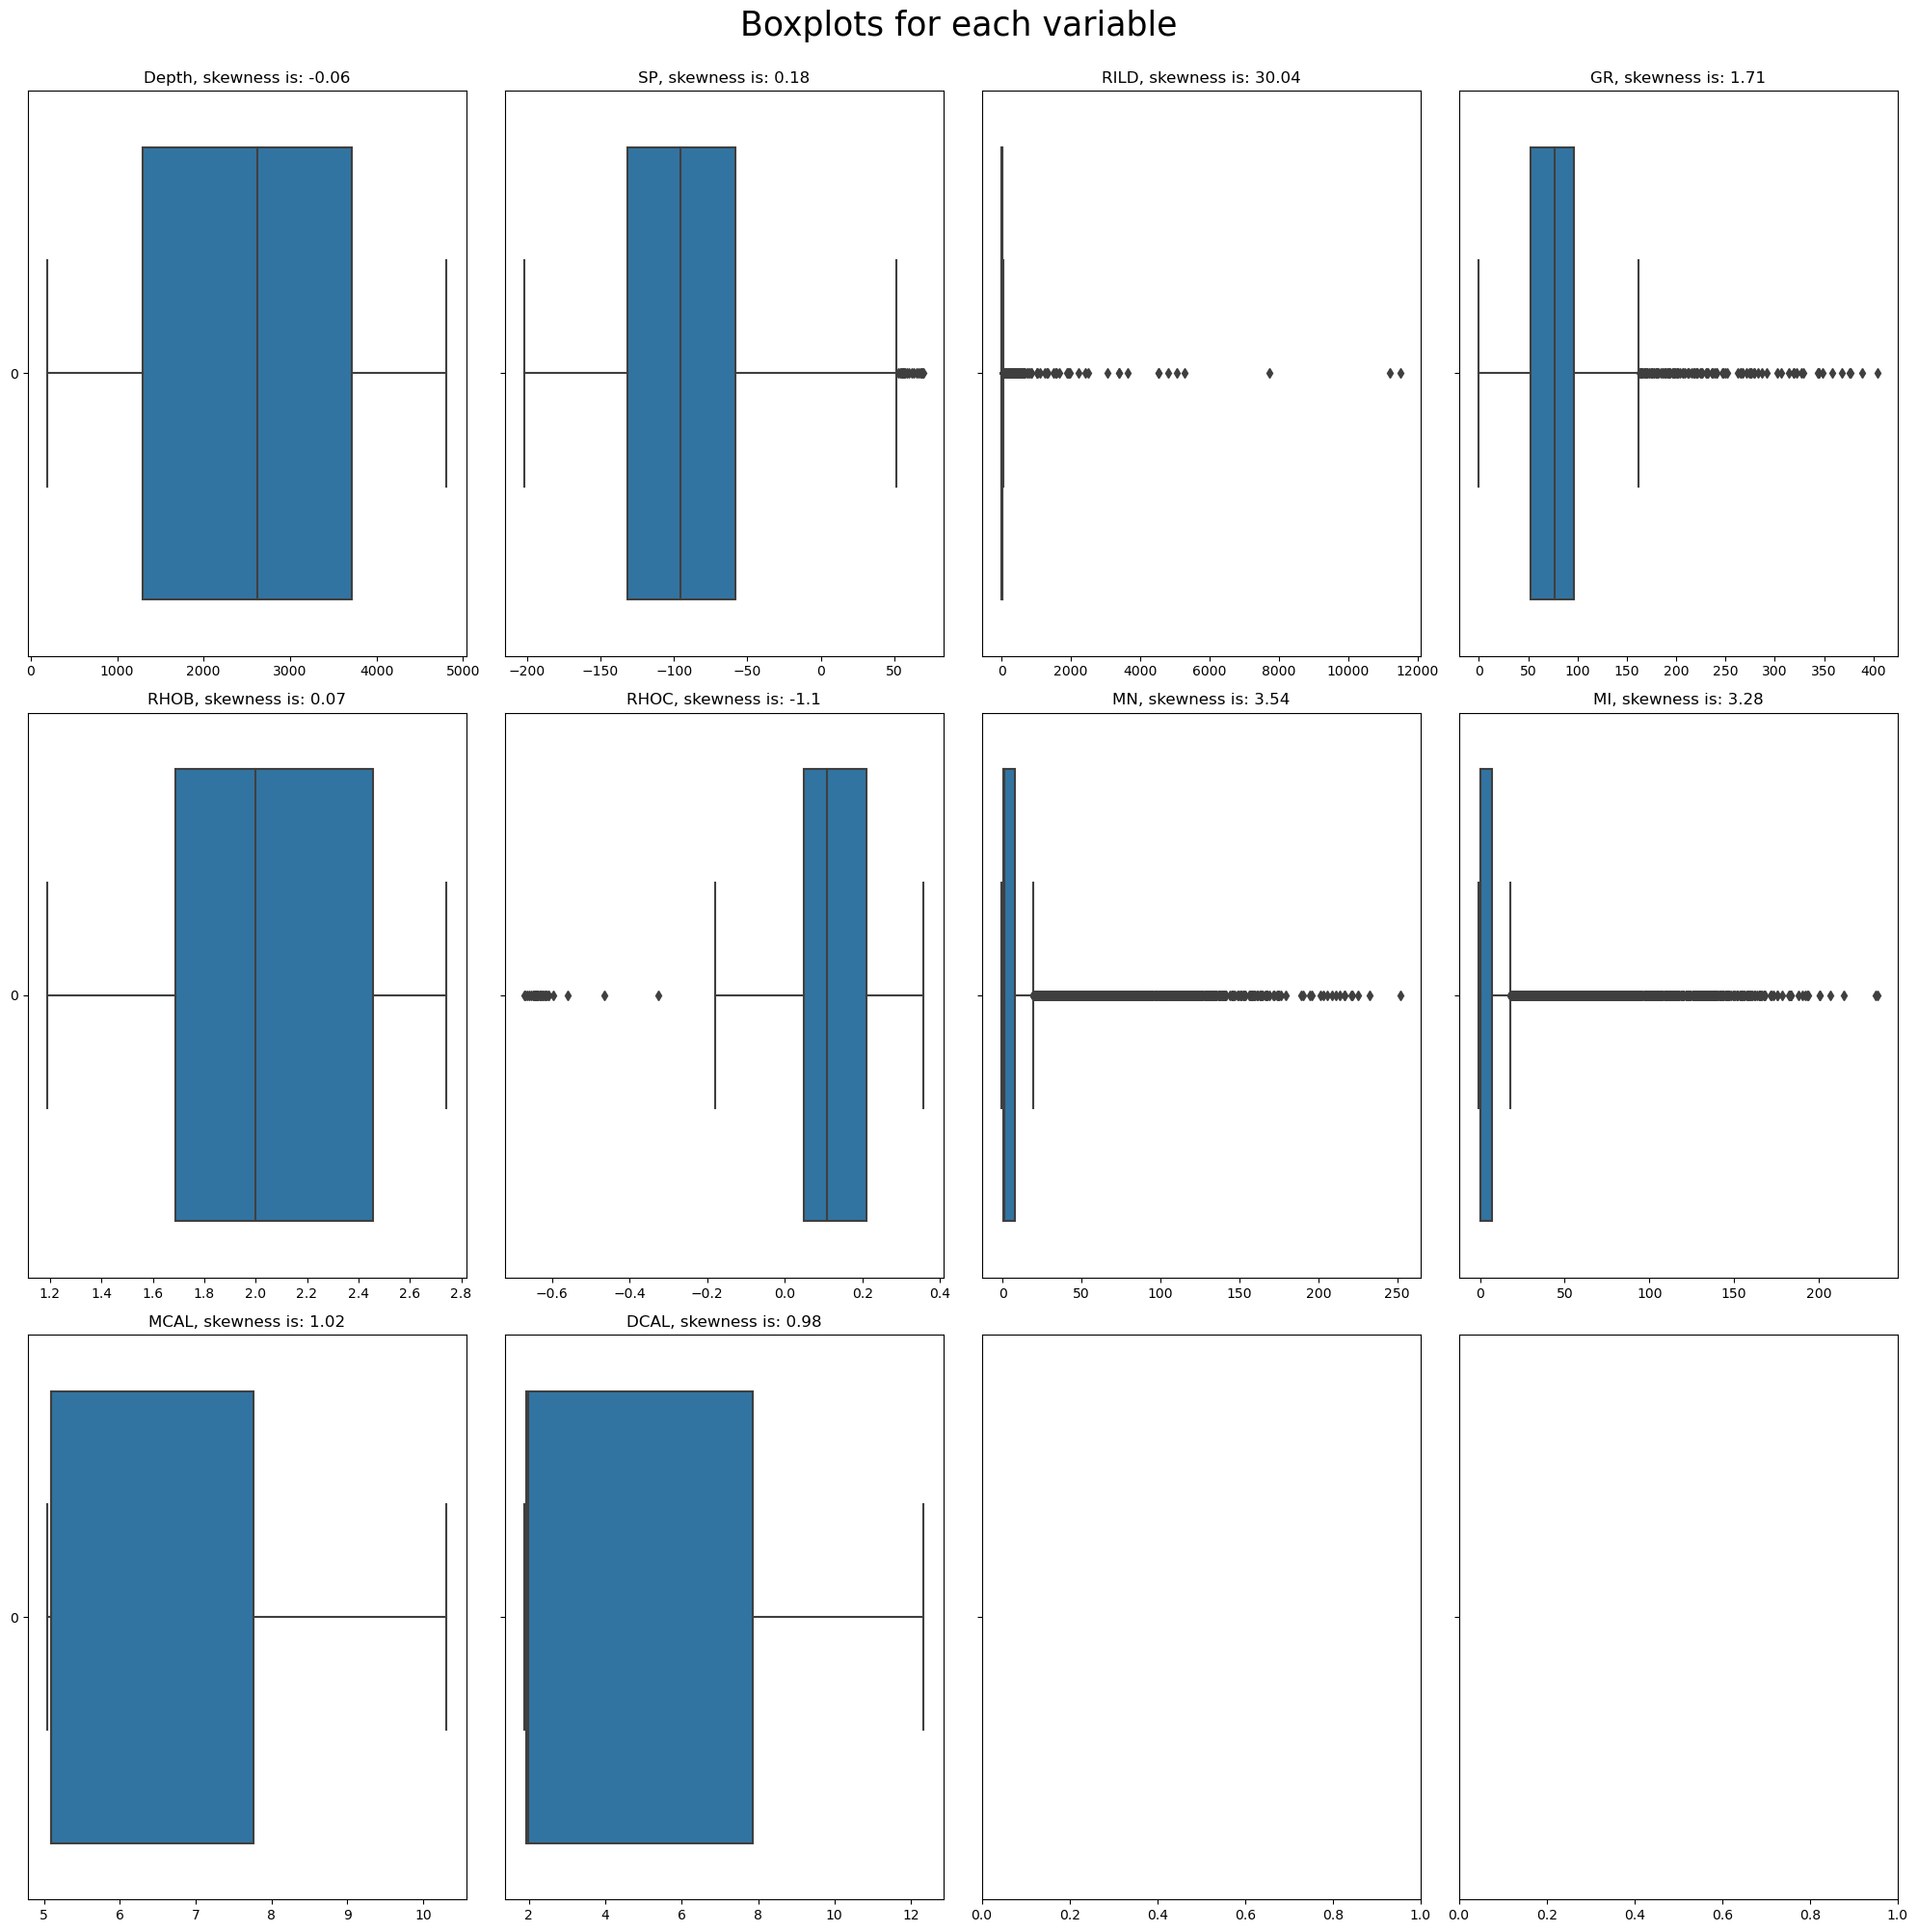

In [17]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,20))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=df_extracted, columns_list=numeric_columns, rows=3, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

In [18]:
def IQR_method (df,n,features):
    
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [19]:
Outlier_IOR = IQR_method(df_extracted,1,numeric_columns)
df_out = df_extracted.drop(Outlier_IOR,axis=0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [20]:
from scipy import stats
import numpy as np
# Tính Z-score cho mỗi cột
z_scores = np.abs(stats.zscore(df_extracted))

# Xác định các outlier (Z-score > 3)
data_no_outliers = df_extracted[(z_scores < 3).all(axis=1)]
# Tổng số điểm ban đầu
total_points = len(data)

# Số điểm sau khi loại bỏ outliers
remaining_points = len(data_no_outliers)

# Số lượng điểm đã bị loại bỏ
outliers_removed = total_points - remaining_points

print(f'Tổng số điểm ban đầu: {total_points}')
print(f'Số điểm sau khi loại bỏ outliers: {remaining_points}')
print(f'Số điểm đã bị loại bỏ: {outliers_removed}')

Tổng số điểm ban đầu: 8739
Số điểm sau khi loại bỏ outliers: 8264
Số điểm đã bị loại bỏ: 475


In [21]:
df_extracted_no_outliers = data_no_outliers


In [22]:
X=data_no_outliers.drop(columns=['GR'])
y = data_no_outliers[ 'GR']

In [23]:
from sklearn.preprocessing import Normalizer
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## CNN


In [24]:
from tensorflow.keras.layers import Dense, Conv1D, Flatten
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

Epoch 1/100
207/207 [==============================] - 2s 5ms/step - loss: 1936.0298 - val_loss: 738.5372
Epoch 2/100
207/207 [==============================] - 1s 3ms/step - loss: 681.4298 - val_loss: 634.8010
Epoch 3/100
207/207 [==============================] - 1s 3ms/step - loss: 616.0598 - val_loss: 589.3162
Epoch 4/100
207/207 [==============================] - 1s 3ms/step - loss: 590.3081 - val_loss: 561.1472
Epoch 5/100
207/207 [==============================] - 1s 3ms/step - loss: 570.8007 - val_loss: 580.2825
Epoch 6/100
207/207 [==============================] - 1s 3ms/step - loss: 558.1764 - val_loss: 538.3803
Epoch 7/100
207/207 [==============================] - 1s 3ms/step - loss: 546.5892 - val_loss: 523.1570
Epoch 8/100
207/207 [==============================] - 1s 3ms/step - loss: 537.5662 - val_loss: 520.8290
Epoch 9/100
207/207 [==============================] - 1s 3ms/step - loss: 531.8647 - val_loss: 508.7787
Epoch 10/100
207/207 [==============================] 

In [25]:
from sklearn.metrics import r2_score
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

print(f'R^2 Score: {r2}')

R^2 Score: 0.5947548193647791


## CNN-LSTM


In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten, TimeDistributed

# Window size
window_size = 5

X_cnn_lstm = []
y_cnn_lstm = []

# Kiểm tra chiều dài của X_scaled và y
if len(X_scaled) - window_size >= 0 and len(y) > window_size:
    for i in range(len(X_scaled) - window_size):
        X_cnn_lstm.append(X_scaled[i:i + window_size])
        y_index = i + window_size
        
        # Kiểm tra nếu y_index nằm trong giới hạn của y
        if y_index < len(y):
            # Sử dụng .iloc[] để truy cập giá trị của y
            y_cnn_lstm.append(y.iloc[y_index])  # Nếu y là DataFrame hoặc Series

X_cnn_lstm = np.array(X_cnn_lstm)
y_cnn_lstm = np.array(y_cnn_lstm)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_cnn_lstm, y_cnn_lstm, test_size=0.2, random_state=42)

# Định nghĩa mô hình CNN-LSTM
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu')),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Đánh giá mô hình
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính R^2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')


Epoch 1/100
207/207 [==============================] - 5s 11ms/step - loss: 1425.1801 - val_loss: 626.6410
Epoch 2/100
207/207 [==============================] - 2s 10ms/step - loss: 588.9268 - val_loss: 561.6486
Epoch 3/100
207/207 [==============================] - 2s 11ms/step - loss: 561.0771 - val_loss: 552.8592
Epoch 4/100
207/207 [==============================] - 2s 11ms/step - loss: 542.5521 - val_loss: 500.8403
Epoch 5/100
207/207 [==============================] - 2s 10ms/step - loss: 516.6025 - val_loss: 577.1393
Epoch 6/100
207/207 [==============================] - 2s 10ms/step - loss: 495.7606 - val_loss: 476.8860
Epoch 7/100
207/207 [==============================] - 3s 13ms/step - loss: 487.9615 - val_loss: 477.6592
Epoch 8/100
207/207 [==============================] - 3s 12ms/step - loss: 468.5845 - val_loss: 434.3379
Epoch 9/100
207/207 [==============================] - 2s 10ms/step - loss: 452.8221 - val_loss: 434.4254
Epoch 10/100
207/207 [=======================

## CNN-LSTM OPTIMIZE RANDOM SEARCH

In [34]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
# Hàm xây dựng mô hình CNN-LSTM
def create_model(filters=64, kernel_size=2, lstm_units=50, learning_rate=0.001):
    model = Sequential([
        TimeDistributed(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'), 
                        input_shape=(X_train.shape[1], X_train.shape[2], 1)),
        TimeDistributed(Conv1D(filters=32, kernel_size=2, activation='relu')),
        TimeDistributed(Flatten()),
        LSTM(lstm_units, activation='relu'),
        Dense(1)  # Lớp đầu ra cho hồi quy
    ])
    
    # Tạo optimizer với learning_rate
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compile mô hình
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Sử dụng KerasRegressor
model = KerasRegressor(build_fn=create_model)

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Các tham số cần tối ưu hóa
param_distributions = {
    'filters': [32, 64, 128],
    'kernel_size': [2, 3, 5],
    'lstm_units': [50, 100, 150],
    'learning_rate': [0.001, 0.01, 0.0001],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100, 200]
}

# Sử dụng RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                   n_iter=10, scoring='neg_mean_squared_error', 
                                   cv=3, verbose=1, n_jobs=-1)

# Chạy RandomizedSearchCV
random_search.fit(X_train, y_train, validation_data=(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/200
104/104 [==============================] - 5s 26ms/step - loss: 1801.9810 - val_loss: 616.0893
Epoch 2/200
104/104 [==============================] - 2s 24ms/step - loss: 602.3482 - val_loss: 575.2480
Epoch 3/200
104/104 [==============================] - 3s 26ms/step - loss: 574.6543 - val_loss: 588.1554
Epoch 4/200
104/104 [==============================] - 3s 25ms/step - loss: 566.4604 - val_loss: 529.7616
Epoch 5/200
104/104 [==============================] - 3s 31ms/step - loss: 543.5493 - val_loss: 520.5602
Epoch 6/200
104/104 [==============================] - 3s 31ms/step - loss: 508.0594 - val_loss: 491.4417
Epoch 7/200
104/104 [==============================] - 3s 25ms/step - loss: 508.0387 - val_loss: 501.2131
Epoch 8/200
104/104 [==============================] - 3s 27ms/step - loss: 506.7050 - val_loss: 468.1494
Epoch 9/200
104/104 [==============================] - 3s 24ms/step - loss: 474.2575 - val

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001641AFC6A90>,
                   n_jobs=-1,
                   param_distributions={'batch_size': [16, 32, 64],
                                        'epochs': [50, 100, 200],
                                        'filters': [32, 64, 128],
                                        'kernel_size': [2, 3, 5],
                                        'learning_rate': [0.001, 0.01, 0.0001],
                                        'lstm_units': [50, 100, 150]},
                   scoring='neg_mean_squared_error', verbose=1)

In [36]:
# In ra tham số tốt nhất
print(f'Best Parameters: {random_search.best_params_}')

# Sử dụng mô hình tốt nhất để đánh giá trên tập test
best_model = random_search.best_estimator_.model

# Đánh giá mô hình
loss = best_model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

# Dự đoán trên tập test
y_pred = best_model.predict(X_test)

# Tính toán R^2 Score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

Best Parameters: {'lstm_units': 150, 'learning_rate': 0.001, 'kernel_size': 2, 'filters': 32, 'epochs': 200, 'batch_size': 64}
52/52 [==============================] - 1s 9ms/step - loss: 114.3314
Model Loss: 114.33137512207031
R^2 Score: 0.8610772537536916
